# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import datetime

# Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\sriak\Desktop\loan.csv')
df.head()

C:\Users\sriak\New folder\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info

<bound method DataFrame.info of          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       NaN        NaN       2500         2500           2500.0   36 months   
1       NaN        NaN      30000        30000          30000.0   60 months   
2       NaN        NaN       5000         5000           5000.0   36 months   
3       NaN        NaN       4000         4000           4000.0   36 months   
4       NaN        NaN      30000        30000          30000.0   60 months   
...      ..        ...        ...          ...              ...         ...   
2260663 NaN        NaN      12000        12000          12000.0   60 months   
2260664 NaN        NaN      12000        12000          12000.0   60 months   
2260665 NaN        NaN      10000        10000          10000.0   36 months   
2260666 NaN        NaN      12000        12000          12000.0   60 months   
2260667 NaN        NaN      16550        16550          16550.0   60 months   

         int_rate  

# Data Cleaning

In [4]:
df_null = pd.DataFrame({'Null_Percentage':100*df.isnull().sum()/len(df),'count': df.isnull().sum()})

df_null[df_null['count']>0]

,Null_Percentage,count
id,100.000000,2260668
member_id,100.000000,2260668
emp_title,7.385826,166969
emp_length,6.498389,146907
annual_inc,0.000177,4
...,...,...
settlement_status,98.537777,2227612
settlement_date,98.537777,2227612
settlement_amount,98.537777,2227612
settlement_percentage,98.537777,2227612


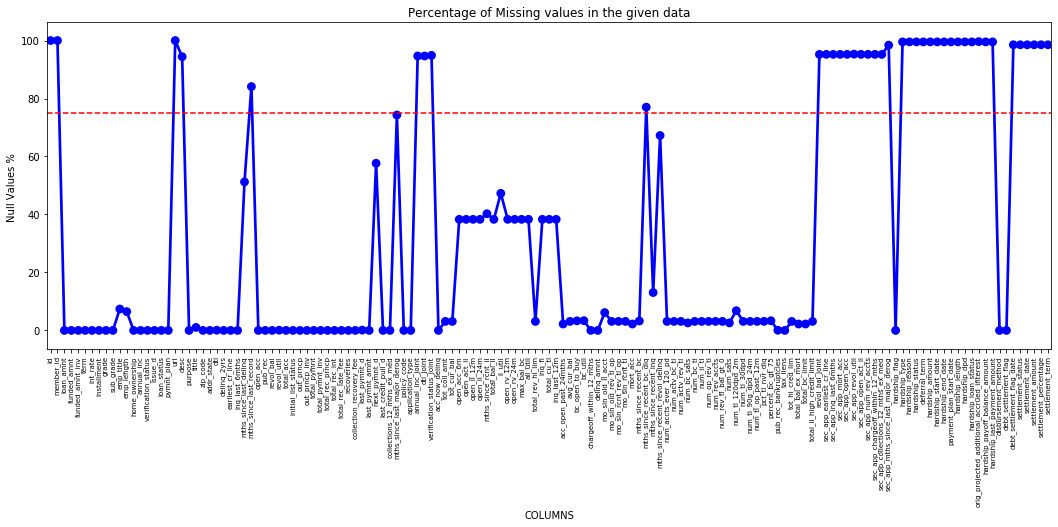

In [5]:
null_DF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_DF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_DF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(75, ls='--',color='red')
plt.title("Percentage of Missing values in the given data")
plt.ylabel("Null Values % ")
plt.xlabel("COLUMNS")
plt.show()

                      NULL Percentage graph column-wise

In [6]:
df.shape

(2260668, 145)

In [7]:
df = df.dropna(axis=1, thresh=int(0.75*len(df)))
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [8]:
df.shape

(2260668, 87)

There were 58 columns with more than 75% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.

In [9]:
for col in df.columns:
    print("{} : {}".format(col,df[col].isnull().sum()))

loan_amnt : 0
funded_amnt : 0
funded_amnt_inv : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_title : 166969
emp_length : 146907
home_ownership : 0
annual_inc : 4
verification_status : 0
issue_d : 0
loan_status : 0
pymnt_plan : 0
purpose : 0
title : 23325
zip_code : 1
addr_state : 0
dti : 1711
delinq_2yrs : 29
earliest_cr_line : 29
inq_last_6mths : 30
open_acc : 29
pub_rec : 29
revol_bal : 0
revol_util : 1802
total_acc : 29
initial_list_status : 0
out_prncp : 0
out_prncp_inv : 0
total_pymnt : 0
total_pymnt_inv : 0
total_rec_prncp : 0
total_rec_int : 0
total_rec_late_fee : 0
recoveries : 0
collection_recovery_fee : 0
last_pymnt_d : 2426
last_pymnt_amnt : 0
last_credit_pull_d : 73
collections_12_mths_ex_med : 145
policy_code : 0
application_type : 0
acc_now_delinq : 29
tot_coll_amt : 70276
tot_cur_bal : 70276
total_rev_hi_lim : 70276
acc_open_past_24mths : 50030
avg_cur_bal : 70346
bc_open_to_buy : 74935
bc_util : 76071
chargeoff_within_12_mths : 145
delinq_amnt : 2

In [10]:
loans = df['loan_status'].value_counts(normalize=True)
loans

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [11]:
#applying the class definitions to the columns
df = df.dropna(subset=['loan_status'])

#using masking to exclude all loans that include 'Current' and 'In Grace Period' text in the fields
df = df[df['loan_status'] != 'Current']
df = df[df['loan_status'] != 'In Grace Period']

#after dropping 'Current' and 'In Grace Period' the lambda function makes the rest of it easy!
df['classes'] = df['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [12]:
classes = df['classes'].value_counts(normalize=True)
classes

1    0.783726
0    0.216274
Name: classes, dtype: float64

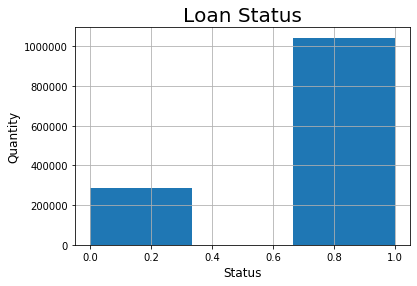

In [13]:
df['classes'].hist(bins=3)
plt.title('Loan Status', size=20);
plt.xlabel('Status', size= 12);
plt.ylabel('Quantity', size=12);

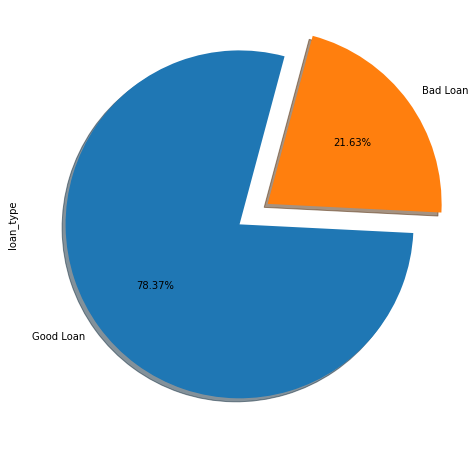

In [14]:
# Bad Loans analysis

# Various types of bad loans
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

# Creating an empty column to store the laon type
df['loan_type'] = np.nan

# Function to set the loan type
def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
# Applying the function to all the statuses    
df['loan_type'] = df['loan_status'].apply(loan_type)

# Making a pie chart of good loans and bad loans
plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)
# 21.63.6% of all loans were bad loans

Columns to remove and reason :

id :
is a random number given to the loan, does not contribute to analysis.

member_id :
is a random number given to the member, does not contribute to analysis.

pymnt_plan :
value for entire dataset is 'n', therefore can be removed.

url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis.

initial_list_status :
value for entire dataset is 'f' out of the possible values, therefore can be removed.

policy_code :
value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.

application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.

acc_now_delinq :
value for entire dataset is '0', therefore can be removed.

delinq_amnt :
value for entire dataset is '0', therefore can be removed.

In [15]:
df = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 
                'avg_cur_bal', 'revol_bal','verification_status','pub_rec_bankruptcies','interest_rate_buckets','emp_title','issue_d','addr_state','earliest_cr_line_year','total_acc','title','total_pymnt','ratio'])
df.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
issue_d                  object
pymnt_plan               object
annual_inc              float64
verification_status      object
purpose                  object
dti                     float64
delinq_2yrs             float64
loan_status              object
zip_code                 object
avg_cur_bal             float64
revol_bal                 int64
verification_status      object
pub_rec_bankruptcies    float64
emp_title                object
issue_d                  object
addr_state               object
total_acc               float64
title                    object
total_pymnt             float64
dtype: object

In [16]:
df['ratio'] = df['loan_amnt'] * 10 / df['annual_inc']


In [17]:
df['ratio']

100        3.000000
152        8.888889
170        2.000000
186        1.168831
215        0.187222
             ...   
2260654    3.750000
2260655    2.337662
2260656    3.339038
2260658    1.764706
2260664    4.000000
Name: ratio, Length: 1332021, dtype: float64

In [18]:
df['ratio'].isnull().sum()

4

In [19]:
df['ratio'] 

100        3.000000
152        8.888889
170        2.000000
186        1.168831
215        0.187222
             ...   
2260654    3.750000
2260655    2.337662
2260656    3.339038
2260658    1.764706
2260664    4.000000
Name: ratio, Length: 1332021, dtype: float64

In [20]:
df['ratio'] = df['ratio'].replace([np.inf, -np.inf, -0], 0)

In [21]:
df.ratio

100        3.000000
152        8.888889
170        2.000000
186        1.168831
215        0.187222
             ...   
2260654    3.750000
2260655    2.337662
2260656    3.339038
2260658    1.764706
2260664    4.000000
Name: ratio, Length: 1332021, dtype: float64

Remove string characters in term , emp_length , zipcode column

In [22]:
df['term']

100         36 months
152         60 months
170         36 months
186         36 months
215         36 months
              ...    
2260654     60 months
2260655     60 months
2260656     60 months
2260658     60 months
2260664     60 months
Name: term, Length: 1332021, dtype: object

In [23]:
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [24]:
df['emp_length']

100          5 years
152         < 1 year
170        10+ years
186        10+ years
215          3 years
             ...    
2260654      2 years
2260655    10+ years
2260656    10+ years
2260658     < 1 year
2260664     < 1 year
Name: emp_length, Length: 1332021, dtype: object

In [25]:
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [26]:
df['emp_length']

100         5
152         1
170        10
186        10
215         3
           ..
2260654     2
2260655    10
2260656    10
2260658     1
2260664     1
Name: emp_length, Length: 1332021, dtype: object

In [27]:
df['zip_code']

100        917xx
152        456xx
170        982xx
186        786xx
215        020xx
           ...  
2260654    112xx
2260655    799xx
2260656    600xx
2260658    119xx
2260664    971xx
Name: zip_code, Length: 1332021, dtype: object

In [28]:
df['zip_code'] = df['zip_code'].str.replace(r'\D', '')

In [29]:
df.shape

(1332021, 28)

In [30]:
# df = df.dropna(axis=0)
# df.shape

In [31]:
# Check for null values
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 77856
home_ownership : 0
issue_d : issue_d    0
issue_d    0
dtype: int64
pymnt_plan : 0
annual_inc : 4
verification_status : verification_status    0
verification_status    0
dtype: int64
purpose : 0
dti : 348
delinq_2yrs : 29
loan_status : 0
zip_code : 1
avg_cur_bal : 70299
revol_bal : 0
verification_status : verification_status    0
verification_status    0
dtype: int64
pub_rec_bankruptcies : 1365
emp_title : 85267
issue_d : issue_d    0
issue_d    0
dtype: int64
addr_state : 0
total_acc : 29
title : 15819
total_pymnt : 0
ratio : 4


In [32]:
df.term = df.term.astype("int64") 
# df.installment = df.installment.astype("int64")

# EDA

In [33]:
# # Create a new dataframe for exploration and drop a few unnecessary columns 
# df_eda = df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)
# df_eda.head()

In [34]:
df1 = df.copy()

In [35]:
df1.shape

(1332021, 28)

In [36]:
loan_status_vis = df1['loan_status'].value_counts()

In [37]:
loan_status_vis

Fully Paid                                             1041952
Charged Off                                             261655
Late (31-120 days)                                       21897
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

Text(0.5, 0, 'Count')

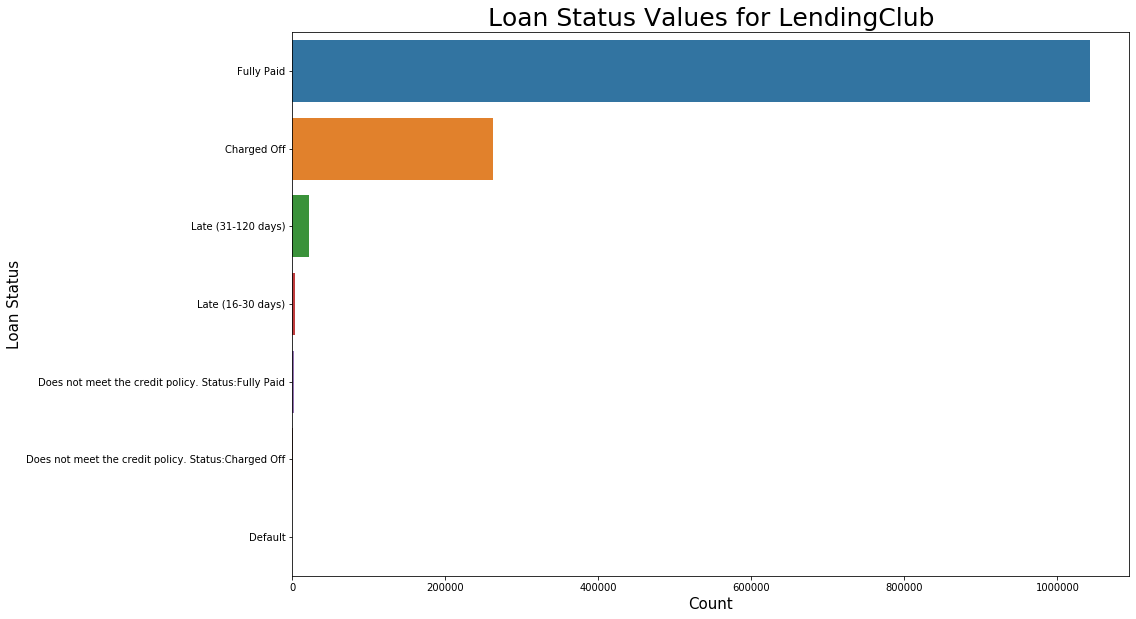

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(y=loan_status_vis.index, x=loan_status_vis)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [39]:
default_vis = df1[df1.loan_status == 'Default']

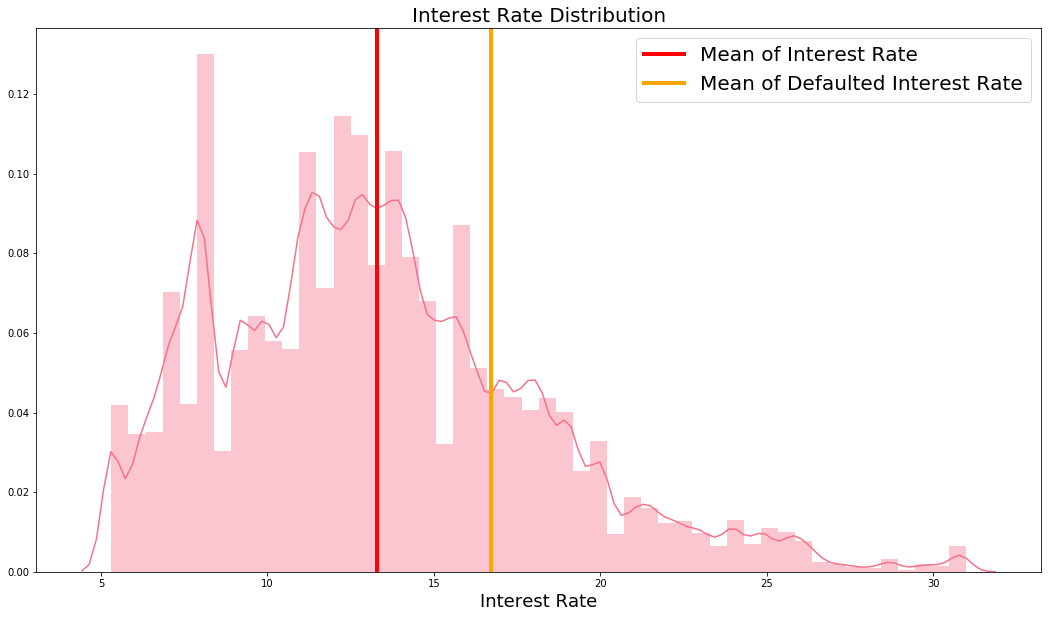

In [40]:
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df1['int_rate'], hist='density')
plt.axvline(x=df1.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [41]:
print("The difference in mean between the two interest rates is:", default_vis.int_rate.mean() - df1.int_rate.mean())

The difference in mean between the two interest rates is: 3.423971518284148


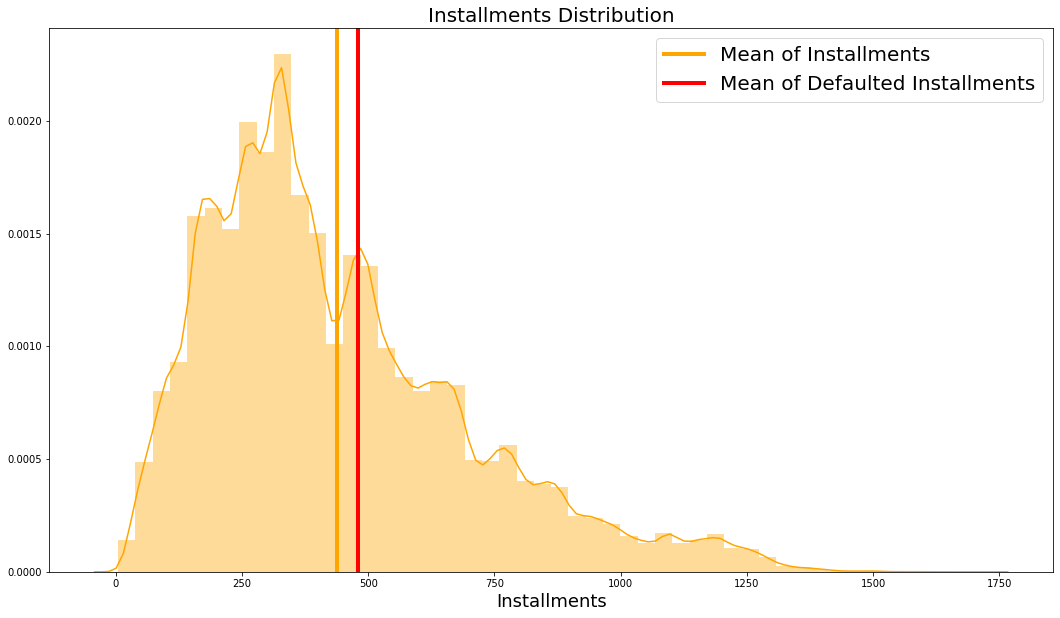

In [42]:
# Visualize the distribution of installments
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df1['installment'], hist='density', color='orange')
plt.axvline(x=df1.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
plt.axvline(x=default_vis.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [43]:
print("The difference in mean between the two installment values is:", default_vis.installment.mean() - df.installment.mean())

The difference in mean between the two installment values is: 41.38657894986625


In [44]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df1['grade'].value_counts()

Text(0.5, 0, 'Count')

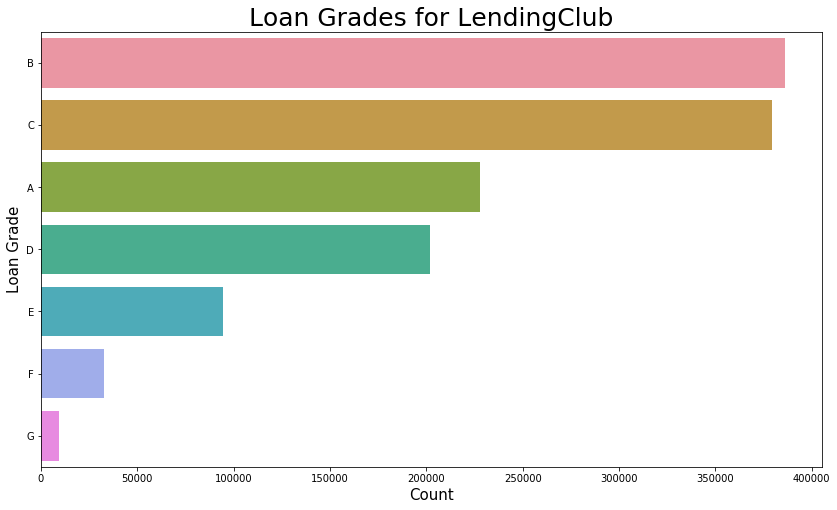

In [45]:
# Plot the value counts
plt.figure(figsize=(14,8))


sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [46]:
# Drop values from df that are more than 50,000
avg_cur_bal_vis = df1[df1.avg_cur_bal < 50000]

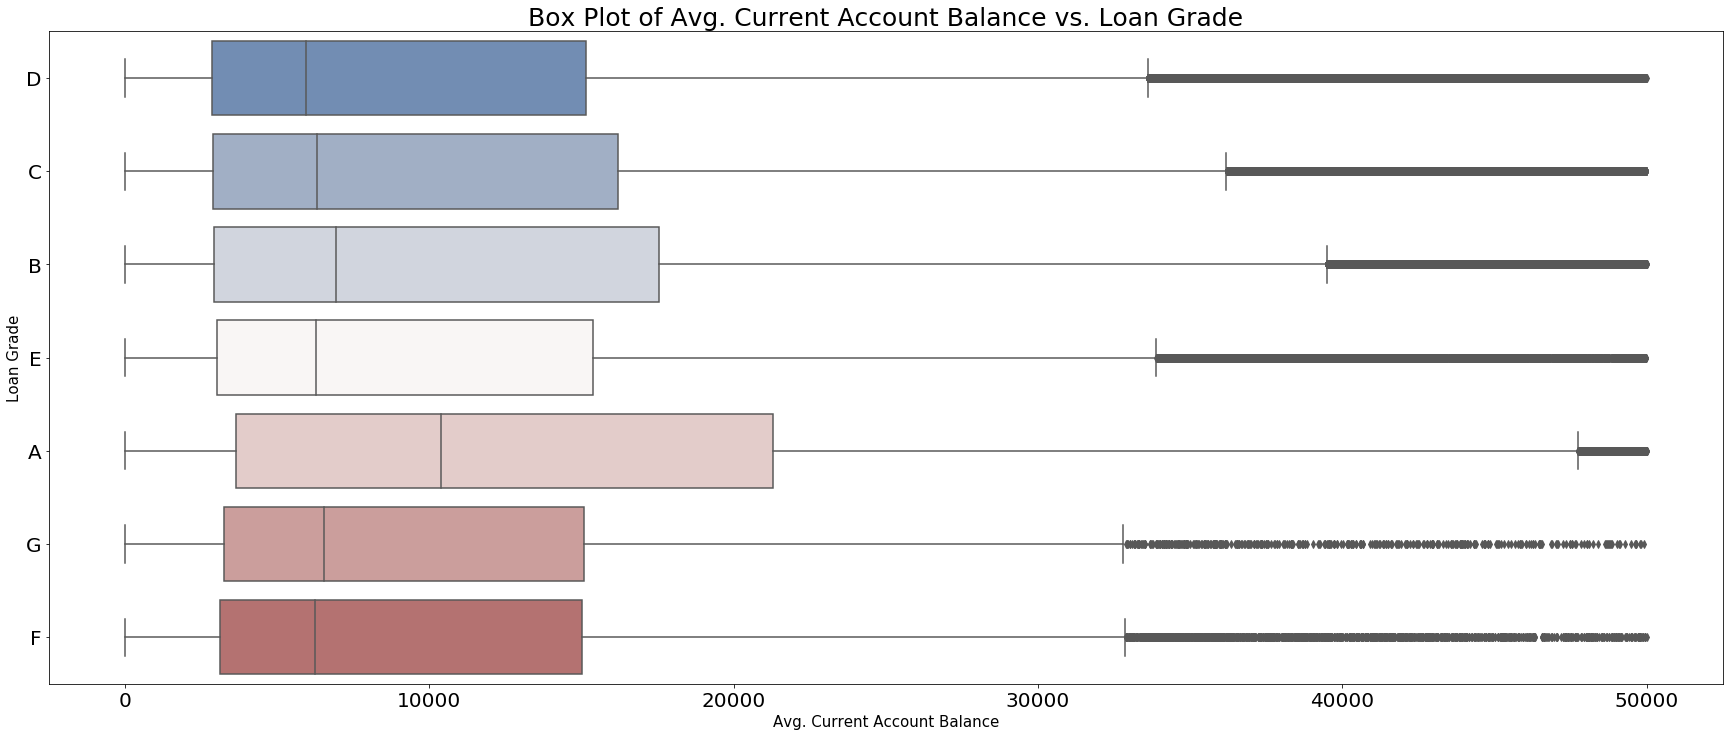

In [47]:
# Plot the borrower's avg current balance compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="avg_cur_bal", y="grade", data=avg_cur_bal_vis, palette="vlag")
plt.title('Box Plot of Avg. Current Account Balance vs. Loan Grade', fontsize=25)
plt.xlabel('Avg. Current Account Balance', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

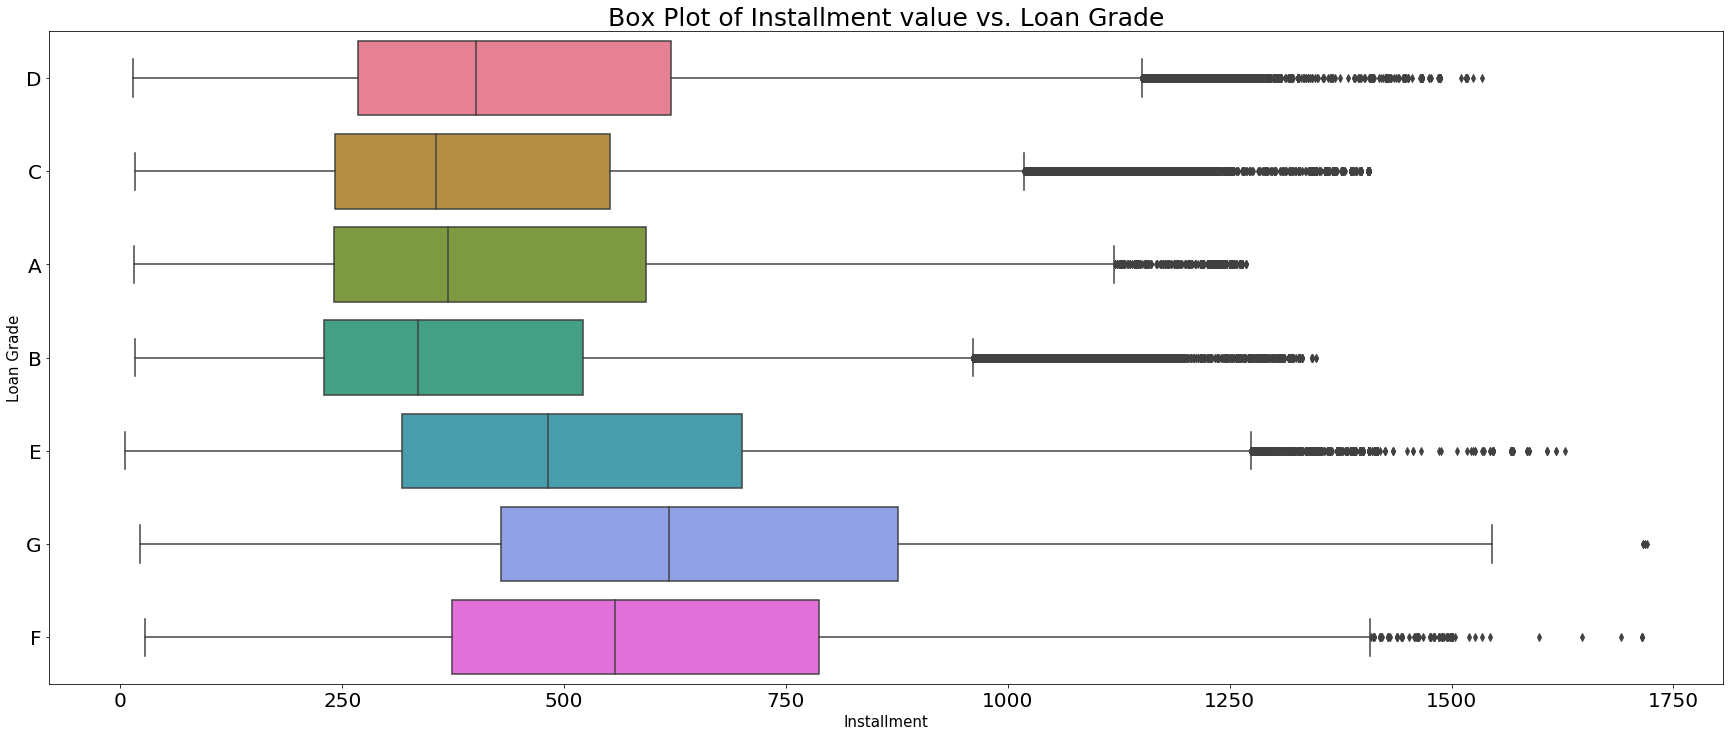

In [48]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=df1, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

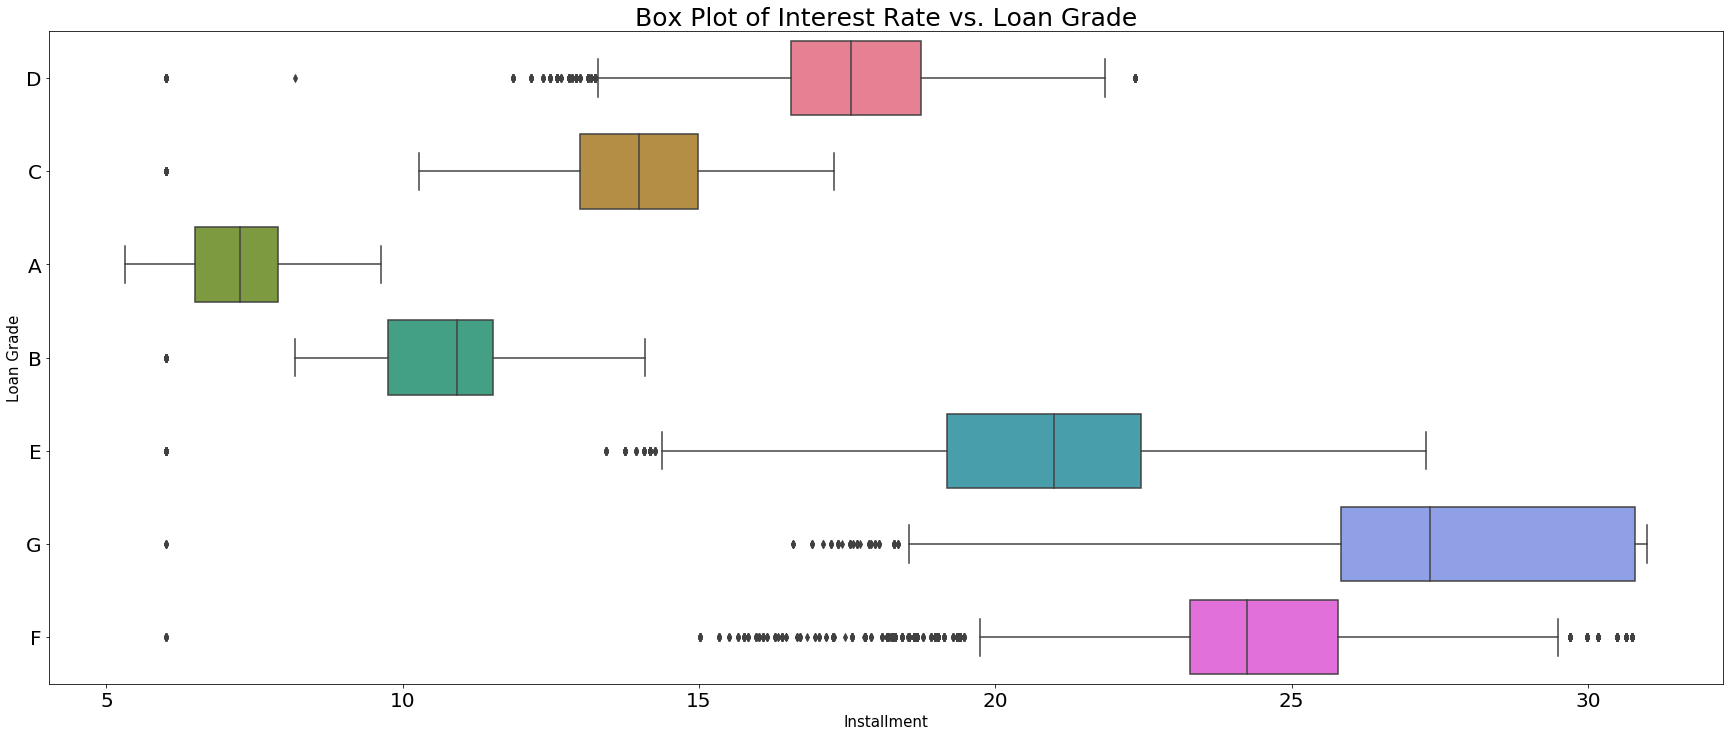

In [49]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=df1, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

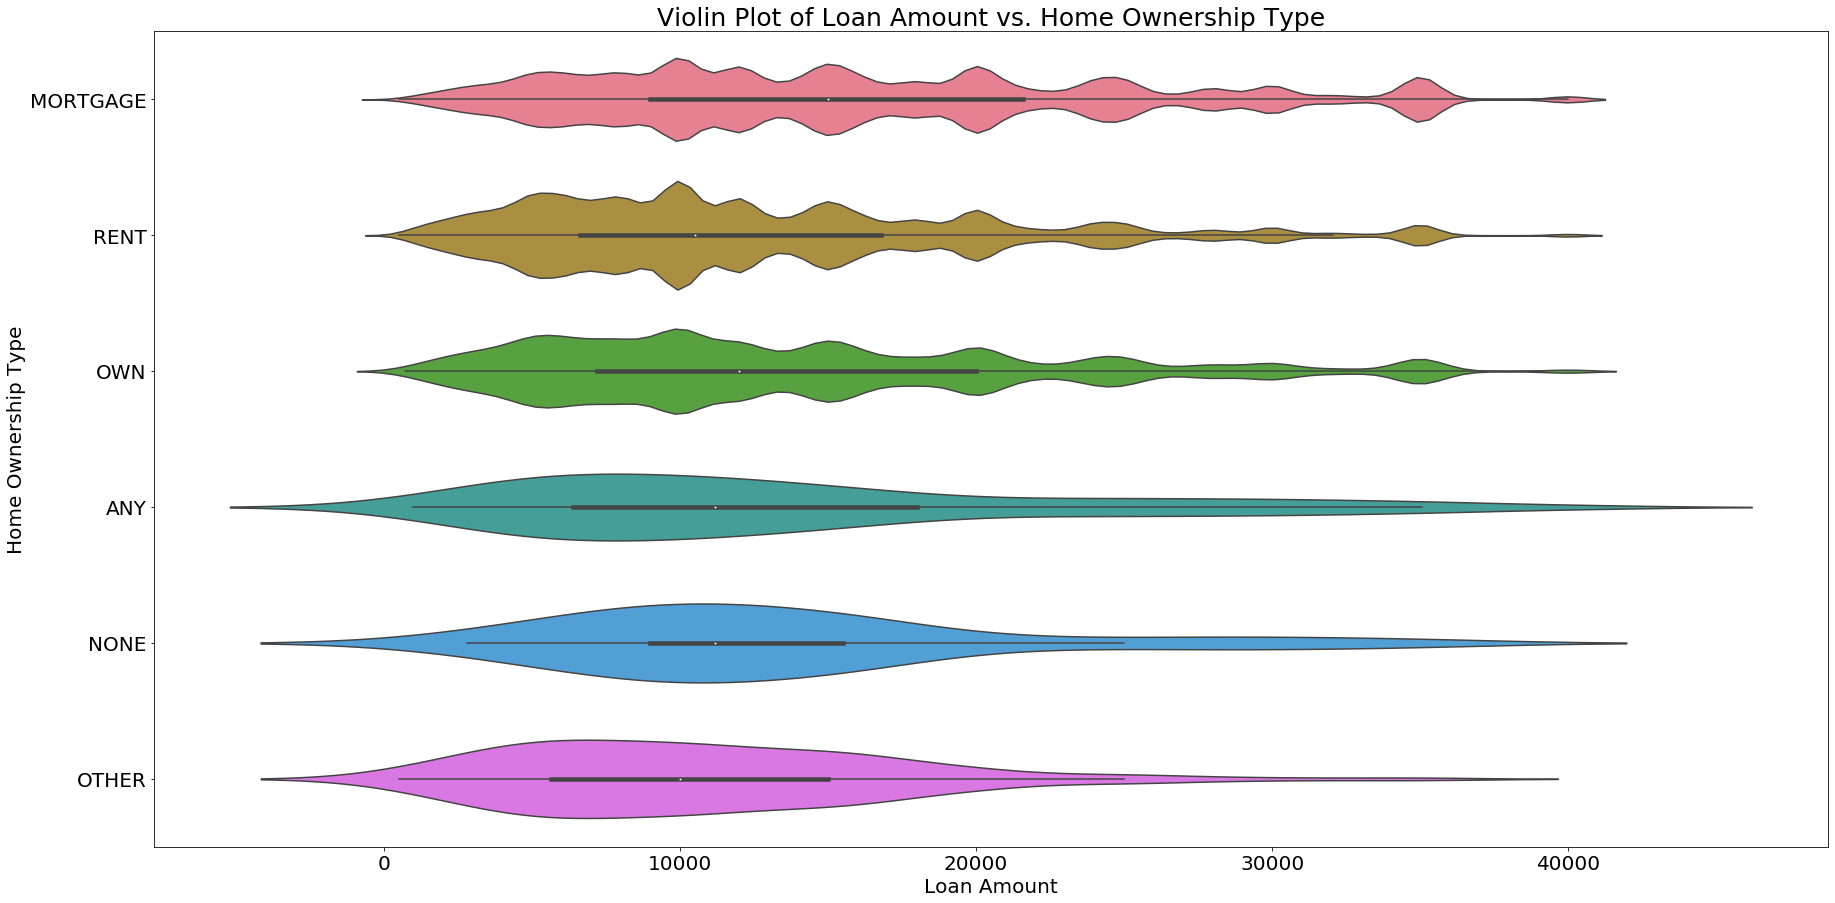

In [50]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df1, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

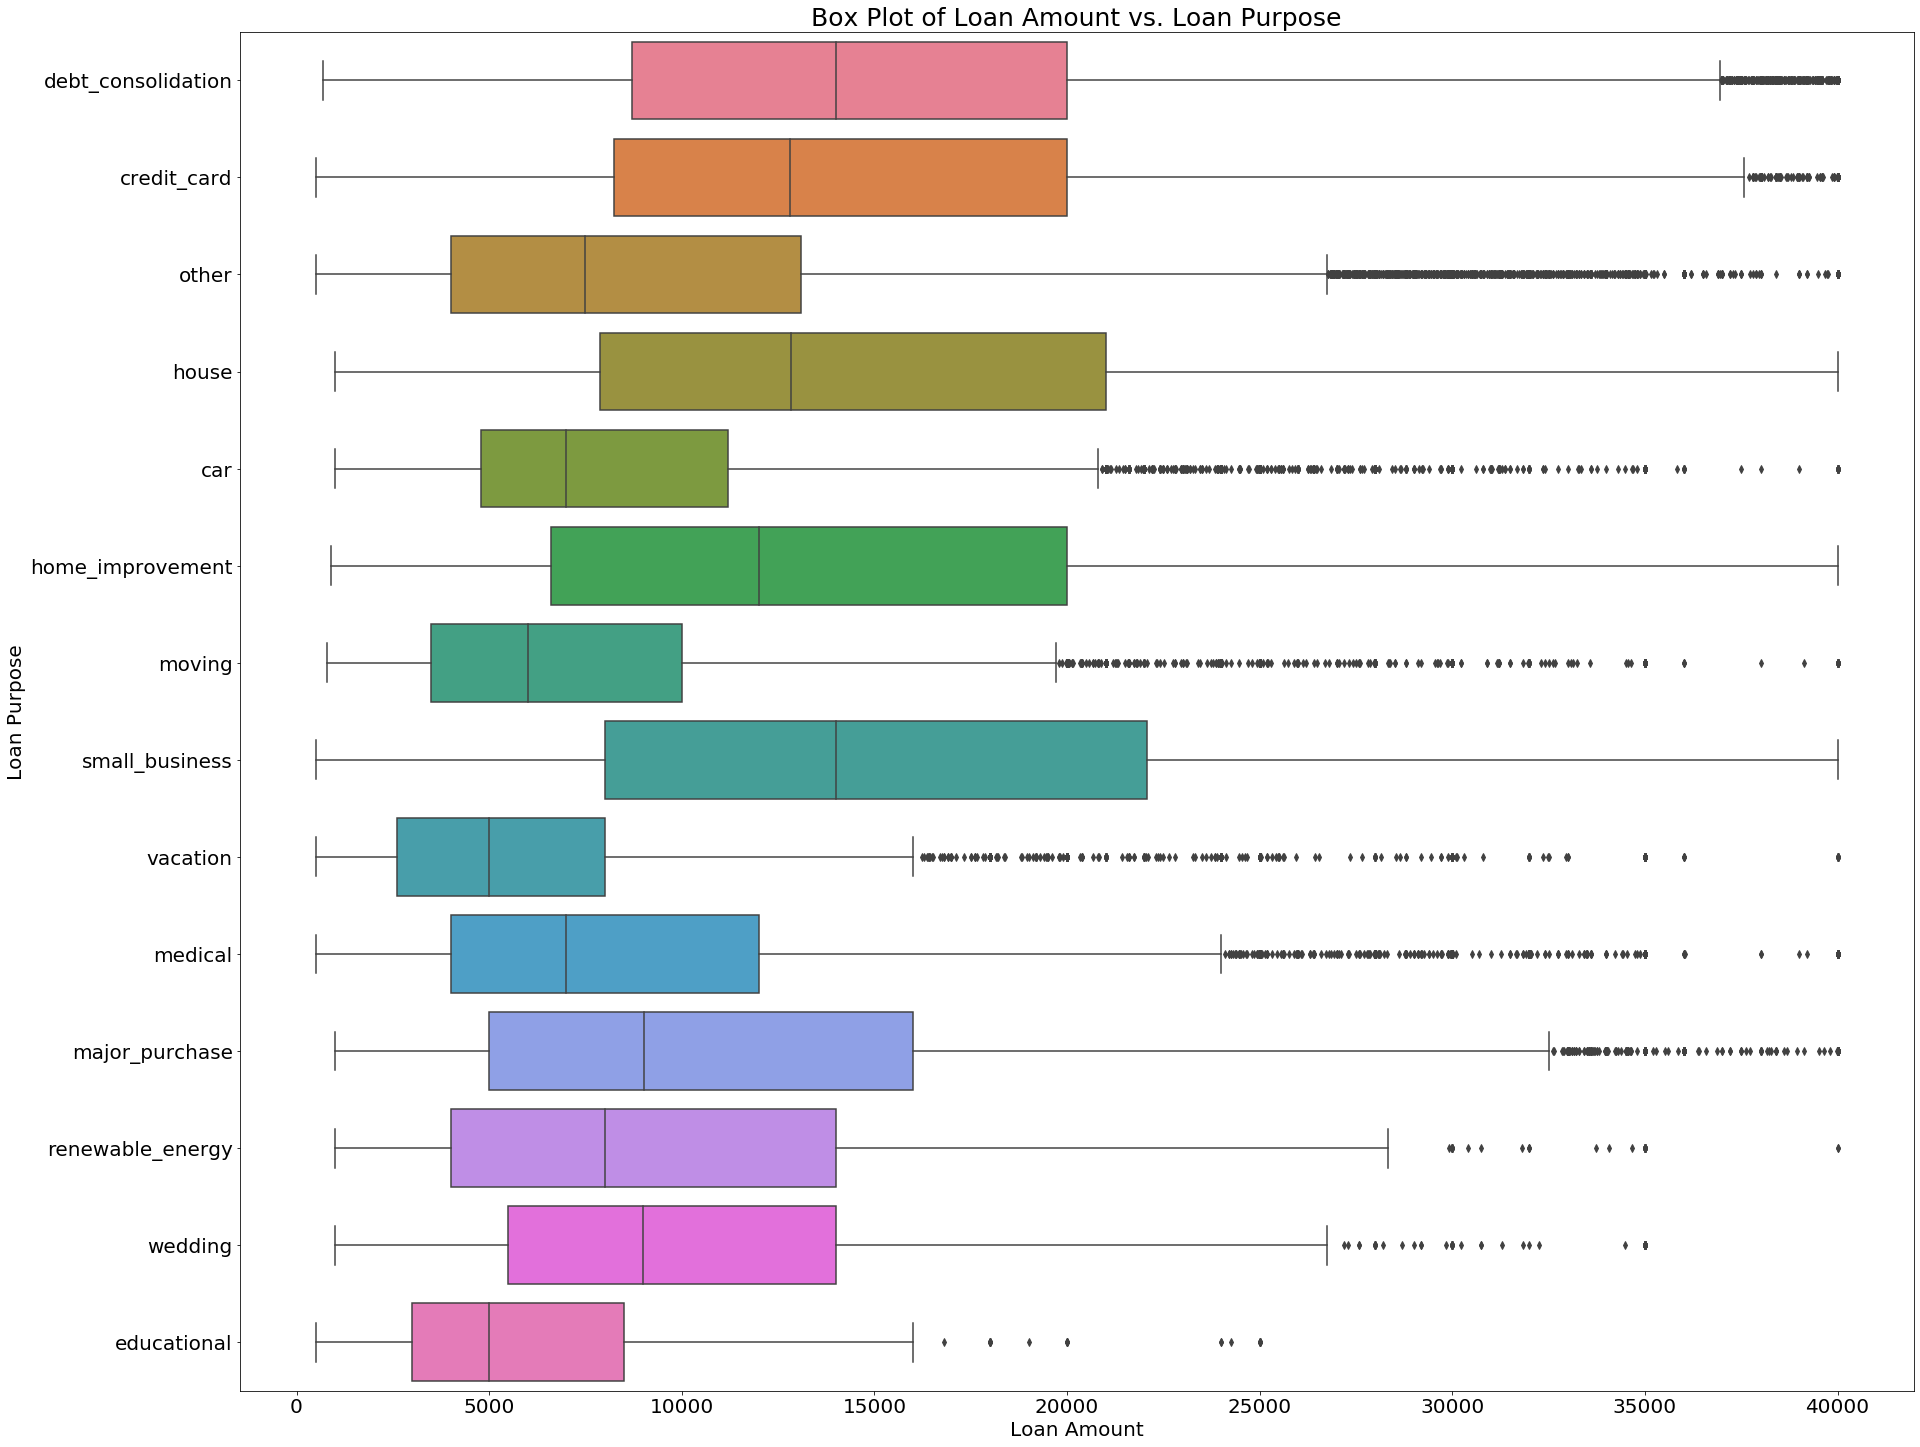

In [51]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df1, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [52]:
# Drop values from df that are more than 100
dti_vis = df1[df1.dti < 100]

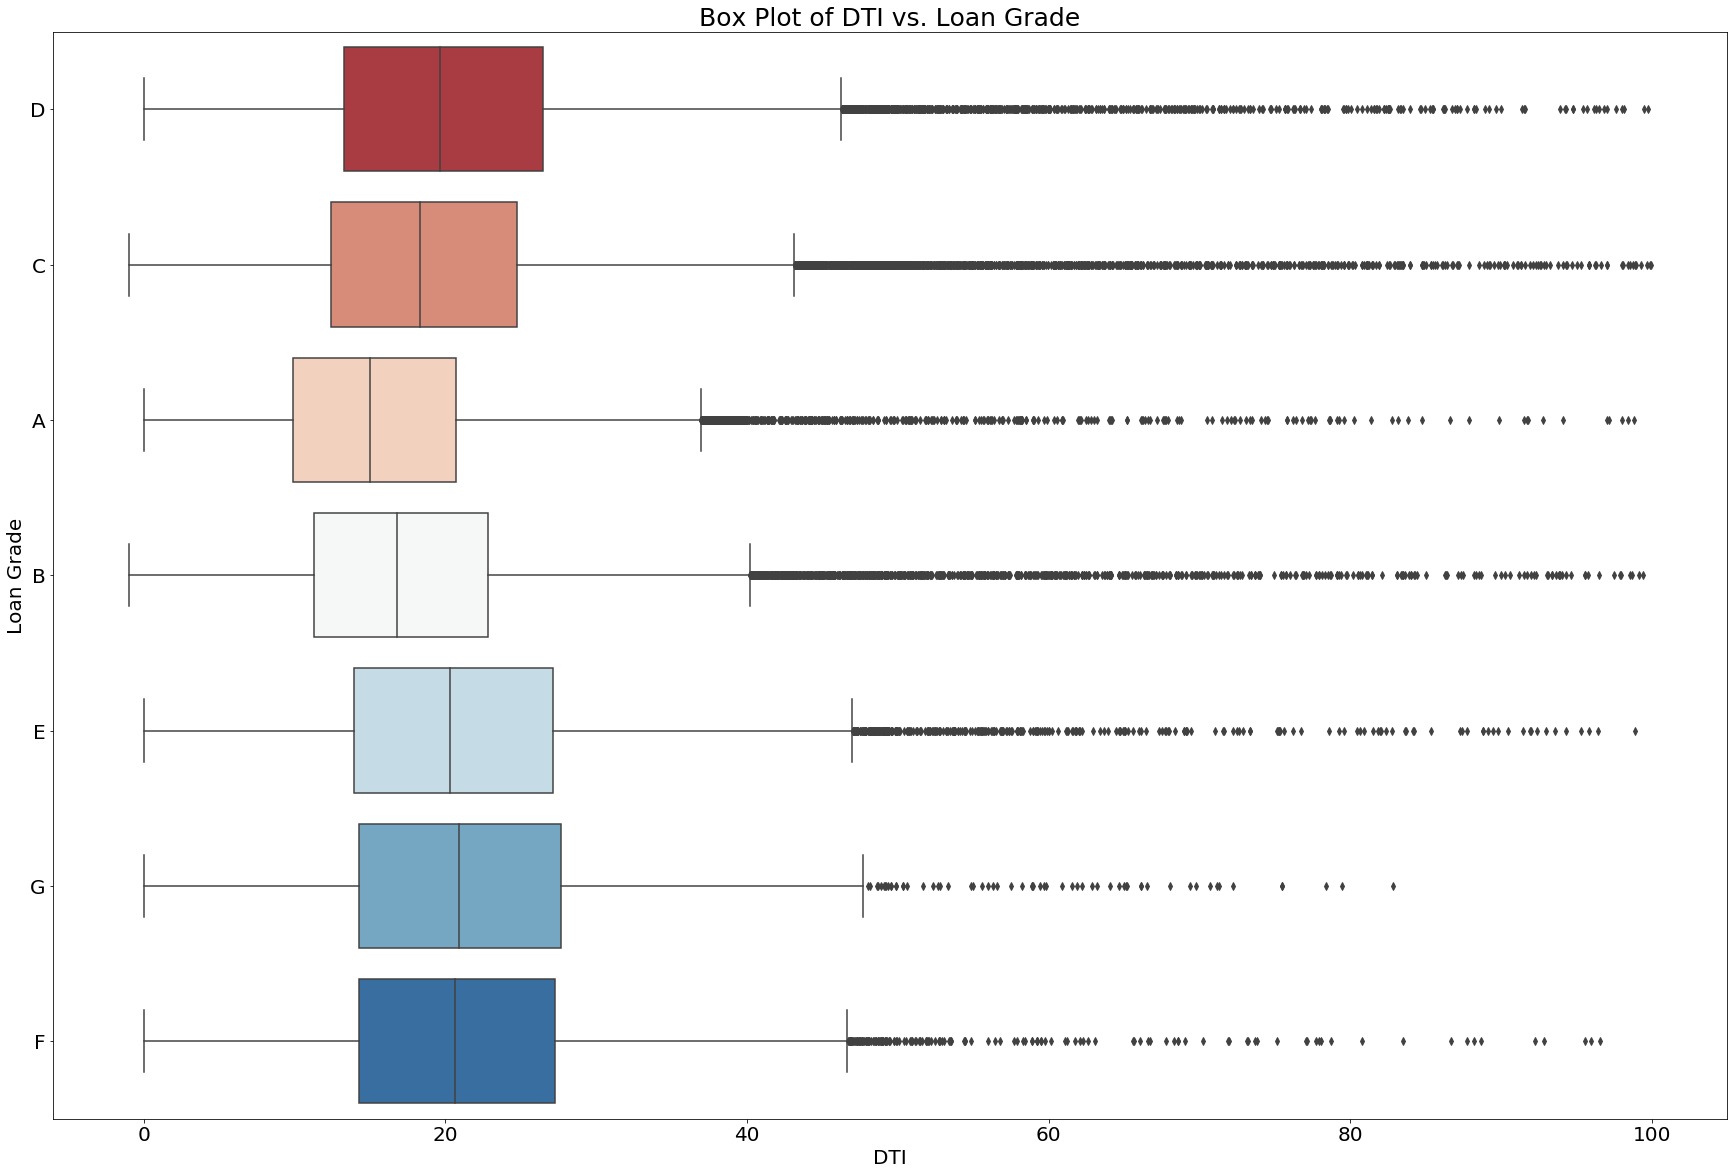

In [53]:
# Plot the borrower's DTI compared to load grade
plt.figure(figsize=(30,20))
sns.boxplot(x="dti", y="grade", data=dti_vis, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

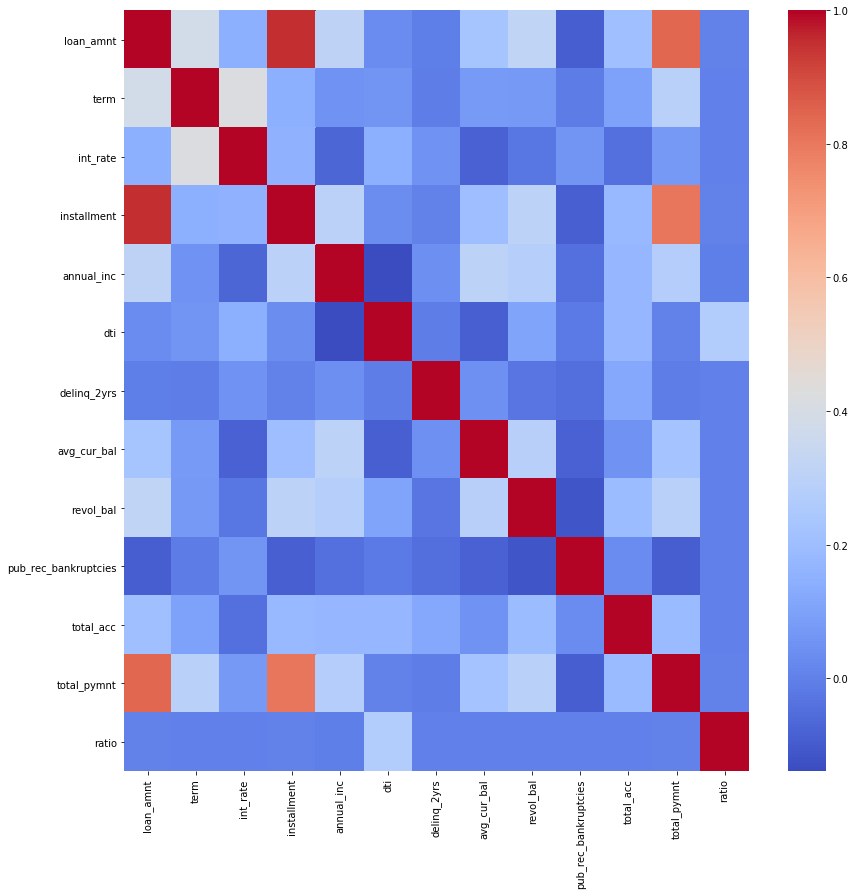

In [54]:
# Set correlation variable
corr = df1.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

There is a strong correlation between installment values and loan amount. This multicollinearity should be removed

In [55]:
df1.shape

(1332021, 28)

# Variable Wise EDA

In [56]:
df1.shape

(1332021, 28)

In [57]:
df1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,pymnt_plan,...,revol_bal,verification_status,pub_rec_bankruptcies,emp_title,issue_d,addr_state,total_acc,title,total_pymnt,ratio
100,30000,36,22.35,1151.16,D,D5,5,MORTGAGE,Dec-2018,n,...,15603,Source Verified,1.0,Supervisor,Dec-2018,CA,19.0,Debt consolidation,30026.442500,3.000000
152,40000,60,16.14,975.71,C,C4,1,MORTGAGE,Dec-2018,n,...,34971,Verified,0.0,Assistant to the Treasurer (Payroll),Dec-2018,OH,37.0,Credit card refinancing,40856.678960,8.888889
170,20000,36,7.56,622.68,A,A3,10,MORTGAGE,Dec-2018,n,...,25416,Not Verified,0.0,Teacher,Dec-2018,WA,19.0,Credit card refinancing,20215.792430,2.000000
186,4500,36,11.31,147.99,B,B3,10,RENT,Dec-2018,n,...,4472,Not Verified,0.0,Accounts Examiner III,Dec-2018,TX,25.0,Credit card refinancing,4549.217149,1.168831
215,8425,36,27.27,345.18,E,E5,3,MORTGAGE,Dec-2018,n,...,36812,Verified,0.0,Senior Director Risk Management,Dec-2018,MA,37.0,Credit card refinancing,8735.148975,0.187222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260654,30000,60,17.09,747.03,D,D1,2,RENT,Oct-2017,n,...,19224,Not Verified,0.0,Senior Manager,Oct-2017,NY,69.0,Debt consolidation,6047.460000,3.750000
2260655,18000,60,30.65,589.57,F,F4,10,MORTGAGE,Oct-2017,n,...,10100,Verified,0.0,Package Delivery Driver,Oct-2017,TX,15.0,Debt consolidation,5393.400000,2.337662
2260656,17950,60,30.17,582.62,F,F3,10,MORTGAGE,Oct-2017,n,...,5959,Source Verified,1.0,Head Custodian,Oct-2017,IL,24.0,Debt consolidation,20803.775467,3.339038
2260658,15000,60,16.02,364.94,C,C5,1,RENT,Oct-2017,n,...,6988,Verified,0.0,Instructional Designer,Oct-2017,NY,87.0,Debt consolidation,16112.317714,1.764706


In [58]:
df1 = df1[df1['loan_status'].isin(['Fully Paid','Charged Off'])]
df1.shape

(1303607, 28)

In [59]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [60]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [61]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [62]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df1[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (df1.loc[df1['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

# Variable  - Loan Status

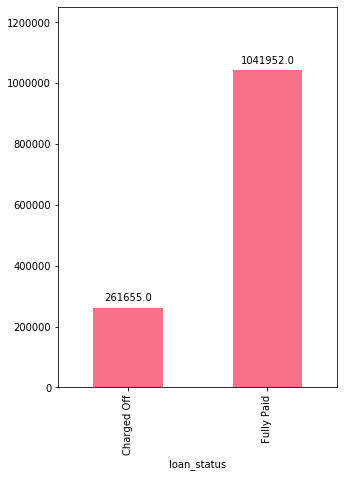

In [63]:
plt.figure(figsize=(5,7))
ax = df1.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

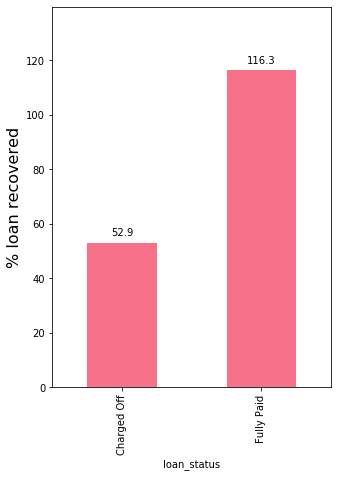

In [64]:
plt.figure(figsize=(5,7))
ax = (df1.groupby('loan_status').total_pymnt.sum() * 100 / df1.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

In [65]:
#Create Derived categorical variable
df1['loan_amnt_bin'] = pd.cut(df1['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

C:\Users\sriak\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


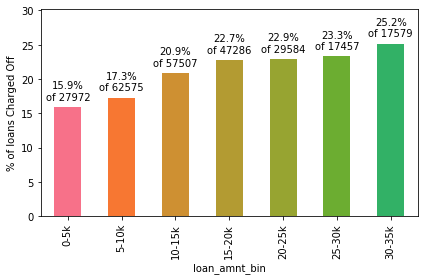

In [66]:
plotLoanStatus(df1, 'loan_amnt_bin')

Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.


# variable - Loan_amount

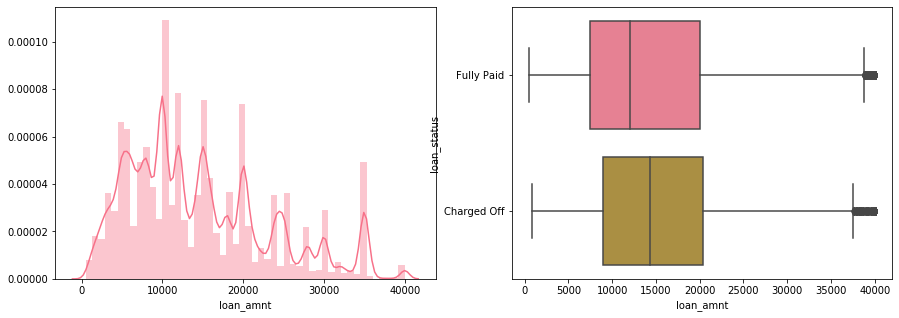

In [67]:
plot_distribution(df1, 'loan_amnt')

In [68]:
df1.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,15548.979381,8797.539356,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1041952.0,14132.493699,8651.520017,500.0,7500.0,12000.0,20000.0,40000.0


# Variable - term

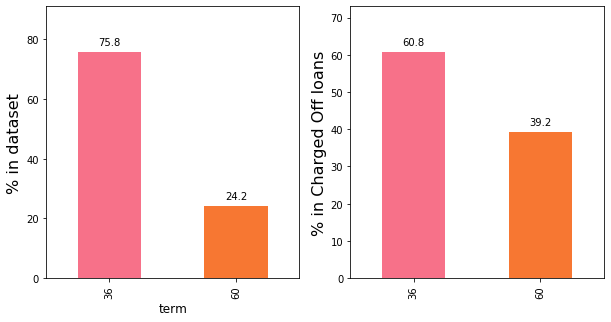

In [69]:
plt.figure(figsize=(10,5))
plot_percentages(df1, 'term')

Observation:

Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
Among Charged Off loans, percentage of term 60 months rises to 45%.

# variable - Purpose

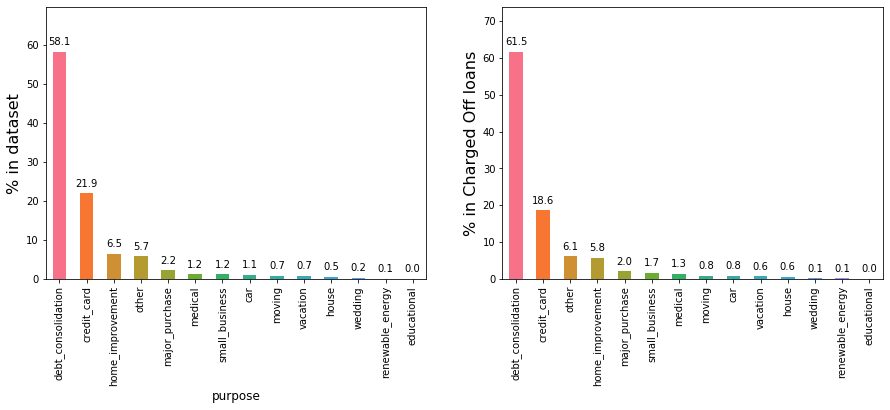

In [70]:

plt.figure(figsize=(15,5))
plot_percentages(df1, 'purpose')

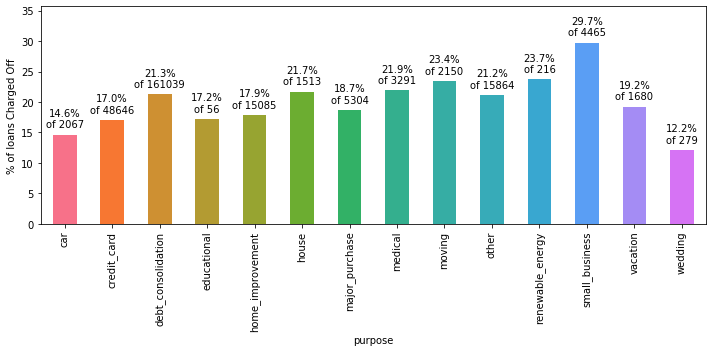

In [71]:
plt.figure(figsize=(10, 5))
plotLoanStatus(df1, 'purpose')

# Variable: pub_rec_bankruptcy

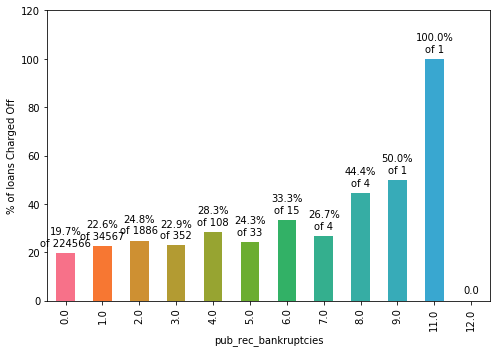

In [72]:
plt.figure(figsize=(7,5))
plotLoanStatus(df1, 'pub_rec_bankruptcies')

# Variable - int_rate

In [73]:
df1.int_rate.describe()

count    1.303607e+06
mean     1.325722e+01
std      4.760544e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

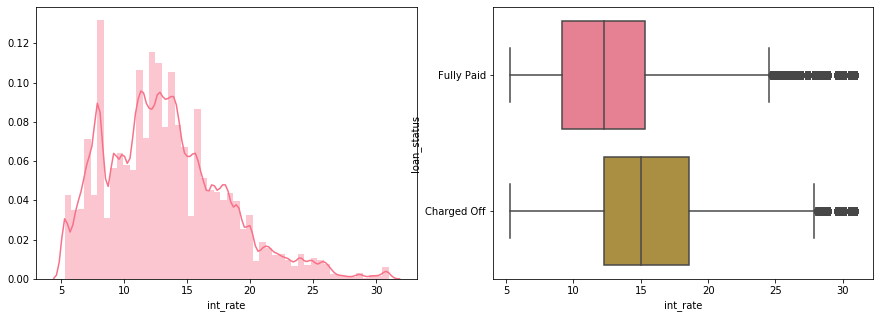

In [74]:
plt.figure(figsize=(15,5))
plot_distribution(df1, 'int_rate')

In [75]:
df1.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,15.712087,4.897685,5.31,12.29,15.05,18.55,30.99
Fully Paid,1041952.0,12.640755,4.520709,5.31,9.17,12.29,15.31,30.99


Observation:

Overall, the intrest rate varies from 5.31% to 30.99%.
The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. 

In [76]:
df1['interest_rate_buckets'] = round(df1['int_rate'])

C:\Users\sriak\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


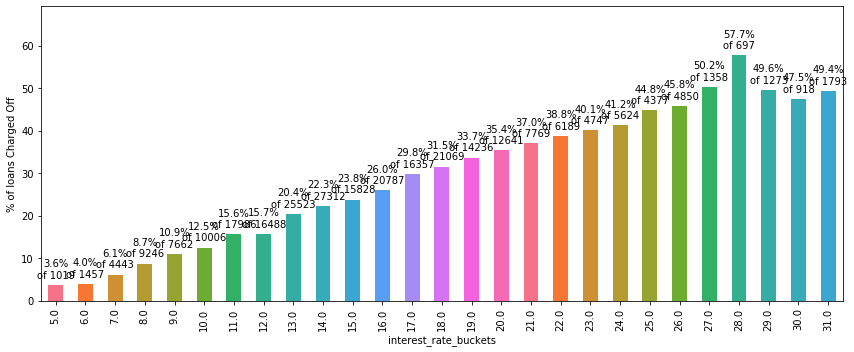

In [77]:
plt.figure(figsize=(12,5))
plotLoanStatus(df1, 'interest_rate_buckets')

# Variable: installment

In [78]:
df1.installment.describe()

count    1.303607e+06
mean     4.380850e+02
std      2.610632e+02
min      4.930000e+00
25%      2.488200e+02
50%      3.754300e+02
75%      5.804500e+02
max      1.719830e+03
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

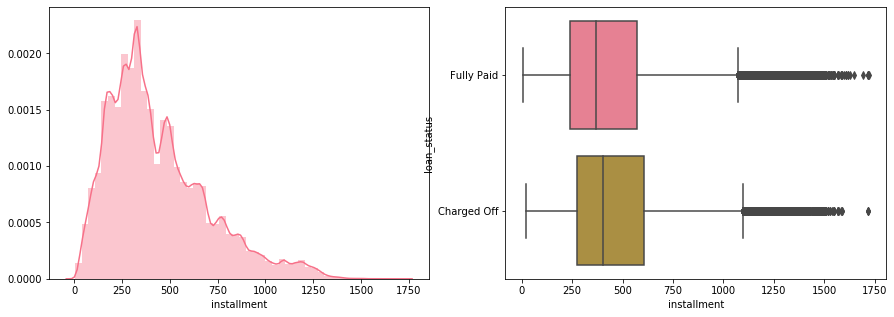

In [79]:
plt.figure(figsize=(15,5))
plot_distribution(df1, 'installment')

In [80]:
df1.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261655.0,464.749514,262.341293,21.62,275.22,402.83,604.145,1717.63
Fully Paid,1041952.0,431.388962,260.312645,4.93,241.12,368.63,573.060,1719.83


# Variable: grade and sub_grade

In [81]:
df1.grade.value_counts()

B    380152
C    369928
A    226243
D    195280
E     91570
F     31483
G      8951
Name: grade, dtype: int64

In [82]:
df1.sub_grade.value_counts(normalize=True).head()

C1    0.063528
B4    0.061833
B5    0.061046
B3    0.060926
C2    0.058955
Name: sub_grade, dtype: float64

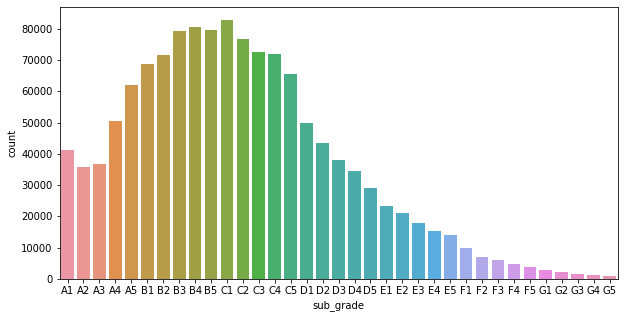

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(df1['sub_grade'], order=sorted(df1.sub_grade.unique()))
plt.show()

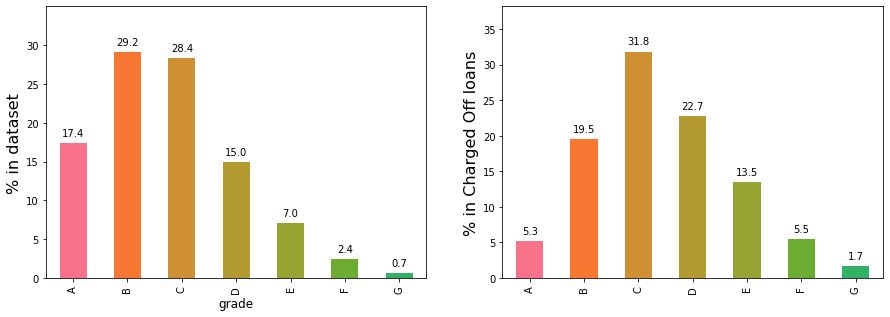

In [84]:

plt.figure(figsize=(15,5))
plot_percentages(df1, 'grade', True)

Observation:

Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
Grade D, E, F, G loans are less safe.
Lending Clubs grading system is working well.

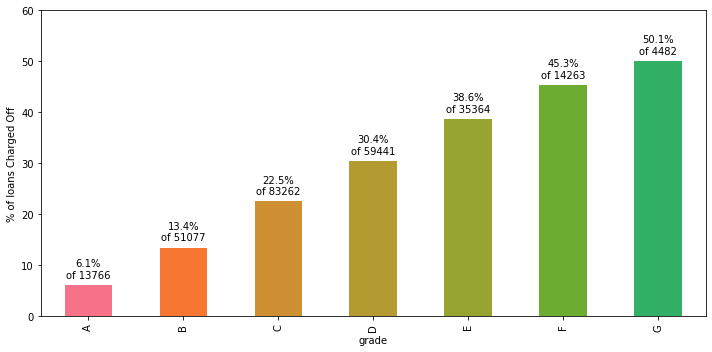

In [85]:
plt.figure(figsize=(10,5))
plotLoanStatus(df1, 'grade')

Grade E onwards are risky, and less numerous.

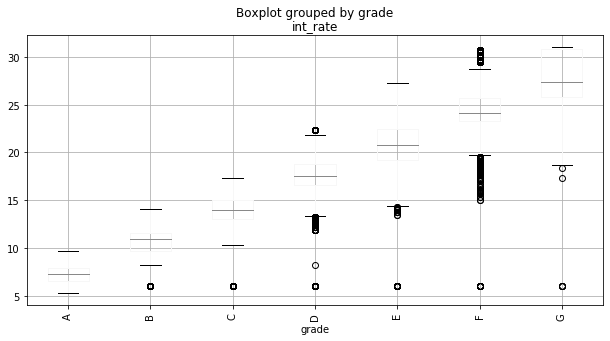

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
df1.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

Observation:

Correctly, charging higher interest rates for lower grade loans.

# Variable - emp_title

In [87]:
top10_emp_title = df1.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

Teacher             20496
Manager             18704
Owner                9803
Registered Nurse     8477
RN                   8253
Supervisor           8012
Driver               7230
Sales                7213
Project Manager      6154
Office Manager       5345
Name: emp_title, dtype: int64

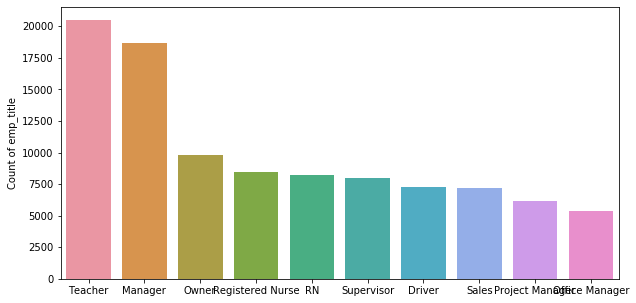

In [88]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

Observation:

Max of the loan takers are Teacher, Manager follwed by Owner and Registered Nurse.

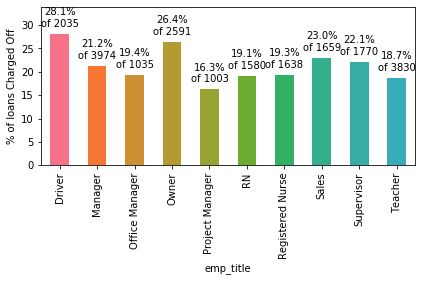

In [89]:

plotLoanStatus(df1[df1['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

# Variable - emp_length

In [90]:
df1.emp_length.value_counts(normalize=True)

10    0.348936
1     0.154889
2     0.095933
3     0.084843
5     0.066460
4     0.063534
6     0.049614
8     0.048141
7     0.047343
9     0.040308
Name: emp_length, dtype: float64

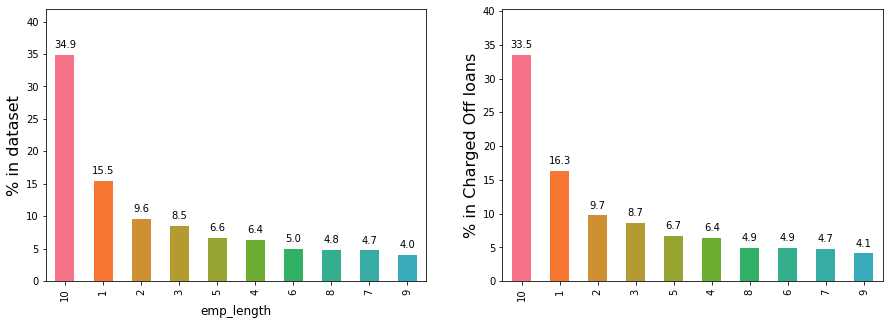

In [91]:
plt.figure(figsize=(15, 5))
plot_percentages(df1, 'emp_length')

Observation:

35% of the of loan taker have an employment length of more than 10 years.


# Variable - home_ownership

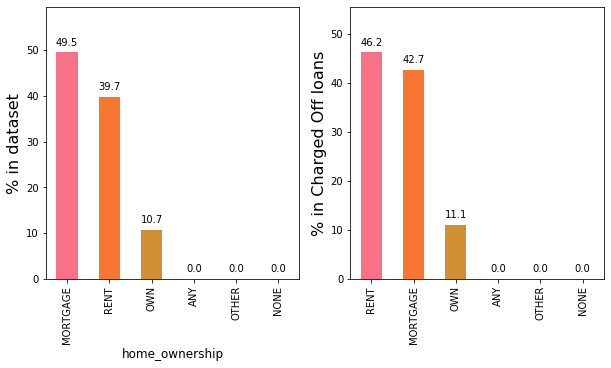

In [92]:

plt.figure(figsize=(10,5))
plot_percentages(df1, 'home_ownership')

# Variable - annual_inc

In [93]:
df1.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    1.303607e+06
mean     7.615899e+04
std      7.004890e+04
min      0.000000e+00
10%      3.400000e+04
25%      4.584000e+04
50%      6.500000e+04
75%      9.000000e+04
90%      1.250000e+05
max      1.099920e+07
Name: annual_inc, dtype: float64

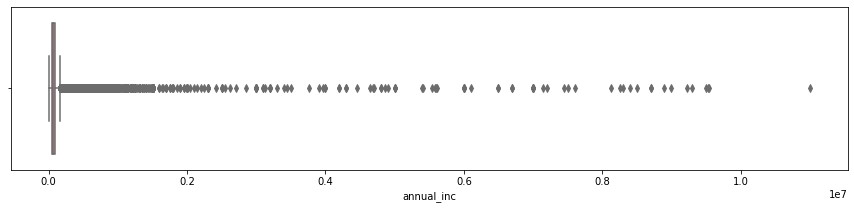

In [94]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=df1['annual_inc'], data=df1)

Median annual income is around 65,000.
Most people have an annual income less than 125000

In [95]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df1[np.abs(df1.annual_inc-df1.annual_inc.mean()) <= (3*df1.annual_inc.std())]

In [96]:
df1.annual_inc.describe()

count    1.303607e+06
mean     7.615899e+04
std      7.004890e+04
min      0.000000e+00
25%      4.584000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

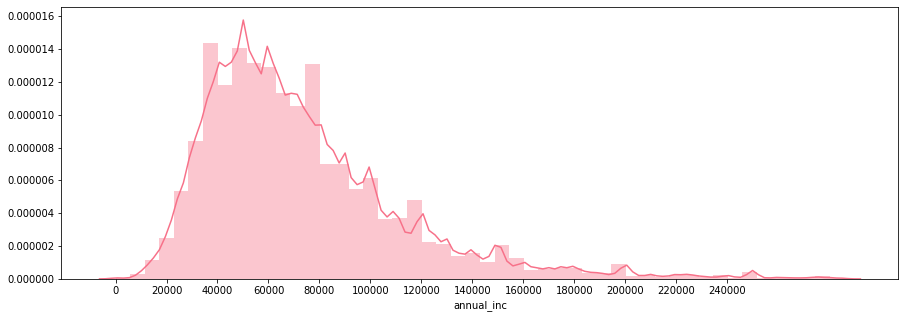

In [97]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

Observation:

10000 seems to be a good bin size to further analyze income as categories

In [98]:
#Create Derived categorical variable
df1['income_bin'] = df1['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
df1['income_bin'] = df1['income_bin'].astype(int)

C:\Users\sriak\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sriak\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

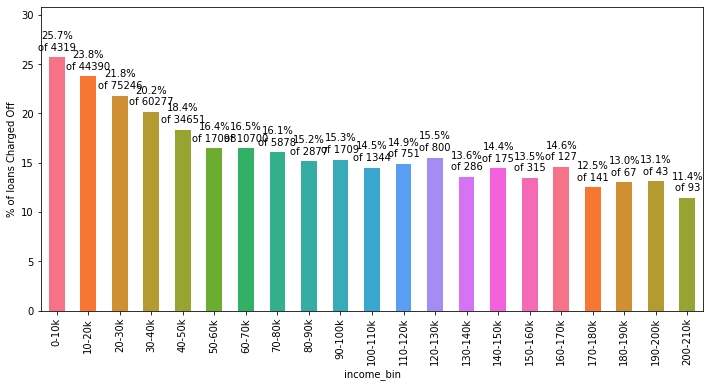

In [99]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(df1.loc[df1['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

# Variable - title

In [100]:
df1.title.describe()

count                1288181
unique                 61678
top       Debt consolidation
freq                  638945
Name: title, dtype: object

In [101]:
df1.title.value_counts().head(10)

Debt consolidation         638945
Credit card refinancing    240679
Home improvement            72125
Other                       63875
Major purchase              22974
Debt Consolidation          15692
Medical expenses            13060
Business                    11359
Car financing               10768
Vacation                     7721
Name: title, dtype: int64

# Variable - addr_state

In [102]:
df1.addr_state.value_counts(normalize=True).head(10)

CA    0.146541
TX    0.081829
NY    0.081607
FL    0.071048
IL    0.038376
NJ    0.035965
PA    0.033842
OH    0.032553
GA    0.032242
VA    0.028269
Name: addr_state, dtype: float64

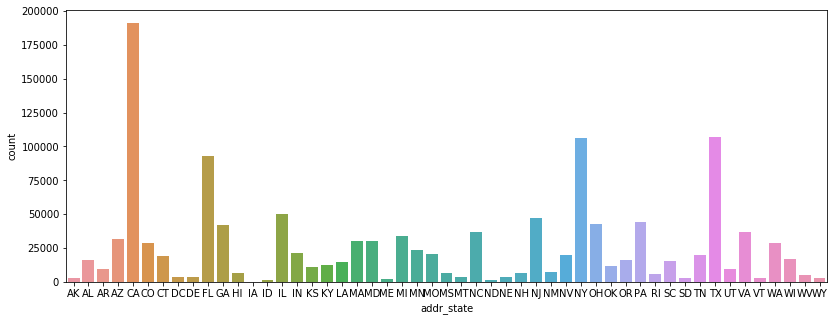

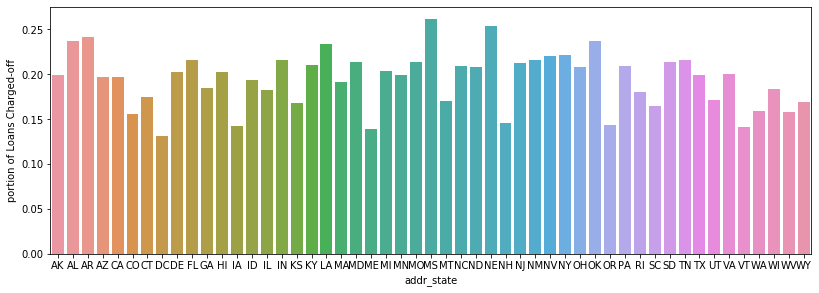

In [103]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(df1['addr_state'], order=sorted(df1.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = df1.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = df1.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()

Maximum loans ~18% are from California following from New york state and Florida .This is to be expected as these are also the three most populous US states

States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect to default.


# Variable - dti

In [104]:
df1.dti.describe()

count    1.303295e+06
mean     1.825875e+01
std      1.093849e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.404000e+01
max      9.990000e+02
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

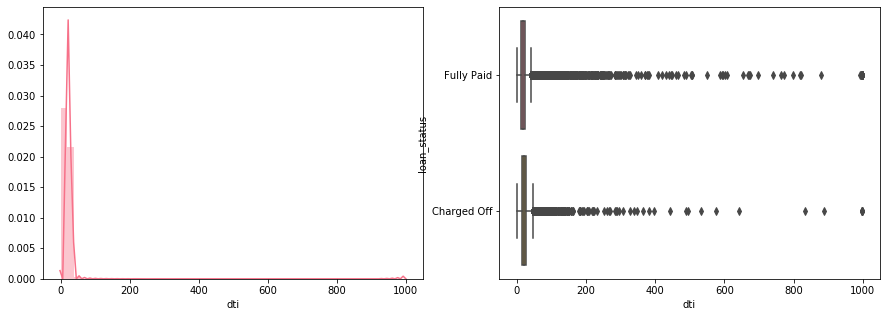

In [105]:
plt.figure(figsize=(10,5))

plot_distribution(df1, 'dti')

In [106]:

# Create derived variable 
df1['dti_bin'] = pd.cut(df1['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

C:\Users\sriak\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


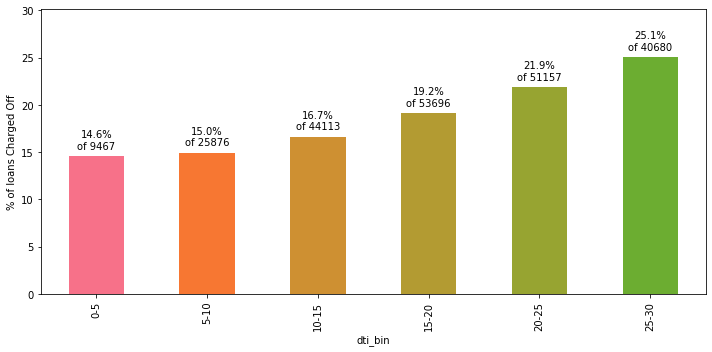

In [107]:
plt.figure(figsize=(10,5))
plotLoanStatus(df1, 'dti_bin')

Observation:

Higher the dti higher the chances of loan being Charged Off

# Variable - total_acc

In [108]:
df1.total_acc.describe()

count    1.303607e+06
mean     2.501894e+01
std      1.199584e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

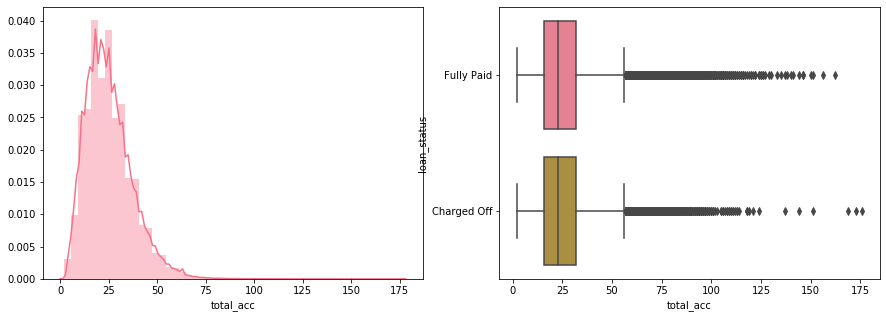

In [109]:
plt.figure(figsize=(15,5))

plot_distribution(df1, 'total_acc')

# Loan amount vs Grade vs Term

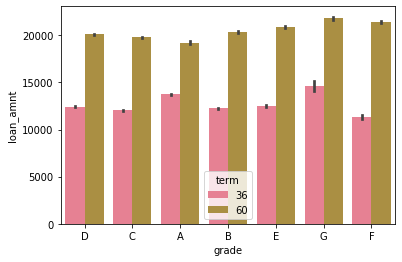

In [110]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df1, estimator=np.mean)
plt.show()

# Loan amount Vs term Vs Loan Status

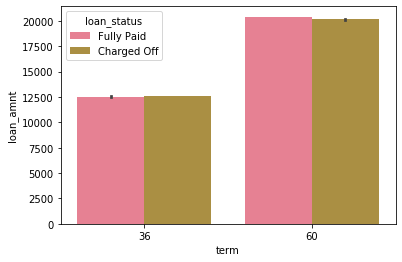

In [111]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df1, estimator=np.mean)
plt.show()